# Дерево решений
## Описание алгоритма и основные шаги
Дерево решений - тип контролируемого машинного обучения, который в основном используется в задачах классификации. По сути это жадное (так как на каждом шаге выбирается наилучшее разбиение), нисходящее, рекурсивное разбиение. Сверху вниз, так как выполнение начинается с корневого узла, где назодятся все записи, а затем делается разбиение.

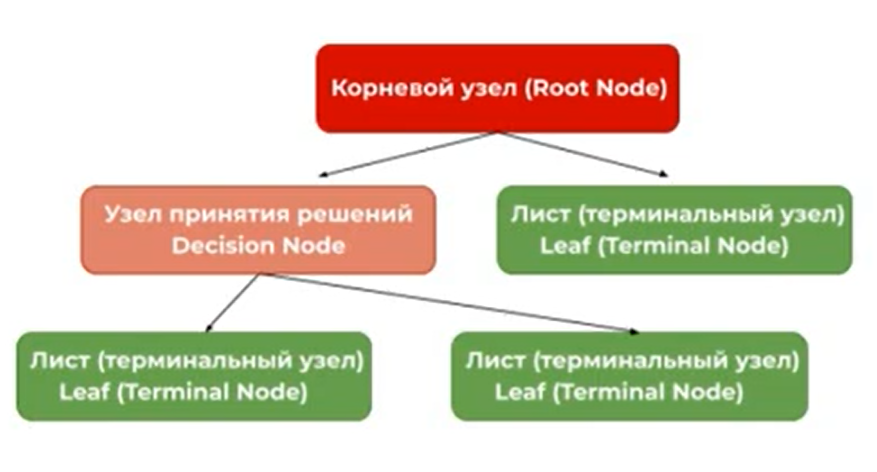

## Набор данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# первый класс
np.seed = 7
train = np.random.normal(size=(100, 2))
train_labels =np.zeros(100)

train.size

200

In [3]:
# добавляем второй класс
train = np.r_[train, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

train.size

400

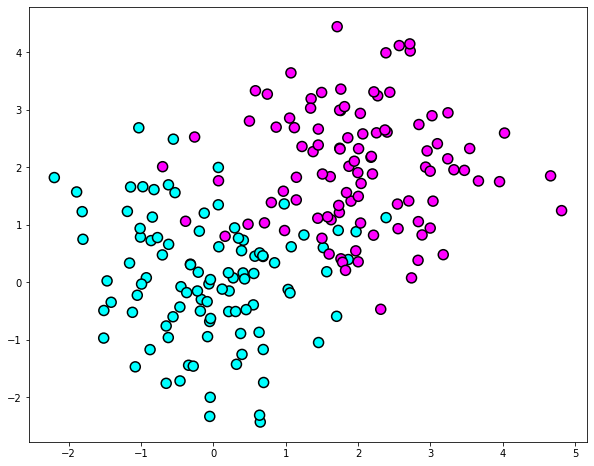

In [4]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(train[:, 0], train[:, 1], c=train_labels, s=100,
            cmap='cool', edgecolors='black', linewidth=1.5)

# plt.plot(range(-2,5), range(4, -3, -1))

## Энтропия


Энтропия - мера случайности или неопределенности. Уровень энтропии колеблется от 0 до 1. Когда энтропия равна 0, это означает, что подмножество чистое, то есть в нем нет случайных элементов. Когда энтропия равна 1, это означает высокую степень случайности. Энтропия обозначается символом H(S).

$$
\begin{equation}
H(S) = -P(0) * \log_2P(0) - P(1) * \log_2P(1)
\end{equation}
$$

P(0) - вероятность принадлежности к классу 0. P(1) - веросятность принадлежности к классу 1.

### Связь между энтропией и вероятностью

Если P(0) = 0, P(1) = 1, или наоборот, то H(S) = 0. Если P(0) = 0.5, P(1) = 0.5, то H(S) равна 1.
Когла энтропия равна 0, это означает, что в подмножество нет энтропии: либо все голоса "да", либо все "нет". Когда она равна 1, то это означает высокую степень случайности.

### Пример использования энтропии

Рассмотрим, как с помощью энтропии можно обнаружить ключевые признаки для разбиения. Будем предсказывать цвет шарика по координате.
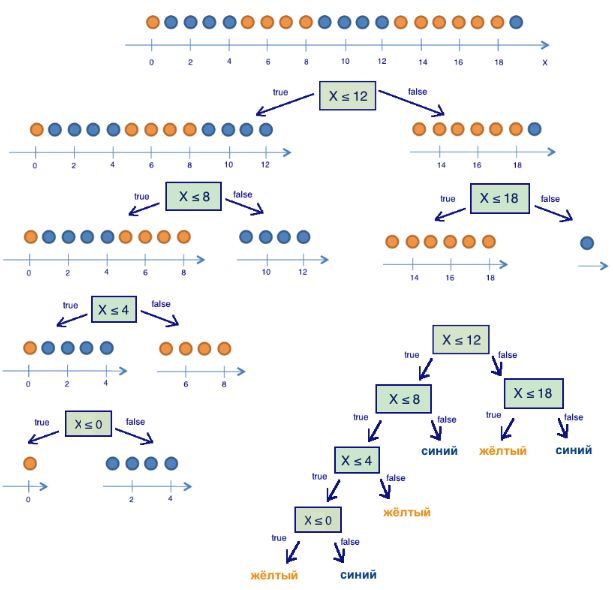

In [5]:
# нет разбиения

import math
P0 = 9 / 20
P1 = 11 / 20
HS0 = -(P0 * math.log(P0, 2) + P1 * math.log(P1, 2))
print(HS0)

0.9927744539878084


In [6]:
# первое разбиение <= 12
import math
P0 = 8/13
P1 = 5/13
HS1 = -(P0 * math.log(P0, 2) + P1 * math.log(P1, 2))
print(HS1)

0.961236604722876


In [7]:
# первое разбиение > 12
import math
P0 = 1/7
P1 = 6/7
HS2 = -(P0 * math.log(P0, 2) + P1 * math.log(P1, 2))
print(HS2)

0.5916727785823275


Энтропия - степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации.

### Информационный выигрыш

Информационный выигрыш для разбинения рассчитывается путем вычитания взвешенных энтропий каждой ветви из исходной энтропии. Используем это для принятия решения о порядке расположения атрибутов в узлах дерева решений.

$$
\begin{equation}
Gain(S,A) = H(S) - \sum\nolimits_{ V \in Values(A) } \frac{|S_V|}{|S|} * H(S_V)
\end{equation}
$$

где H(S) - энтропия, А - атрибут, S - множество примеров X, V - возможные значения A, Sv - подмножество

In [8]:
Gain = HS0 - 13/20 * HS1 - 7/20 * HS2
print(Gain)

0.16088518841412436


В основе популярных алгоритмов построения дерева решений лежит принцип жадной максимизации прироста информации - на кажом шаге выбирается тот признак, при разделении по которому прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине.

## Построение и анализ модели

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# вспомогательная функция, возвращающая решетку для визуализации

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [11]:
# параметр min_samples_leaf указывает, при каком минимальном количество элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

#обучение дерева
clf_tree.fit(train, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

<ipython-input-12-7240db117b00>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='cool')


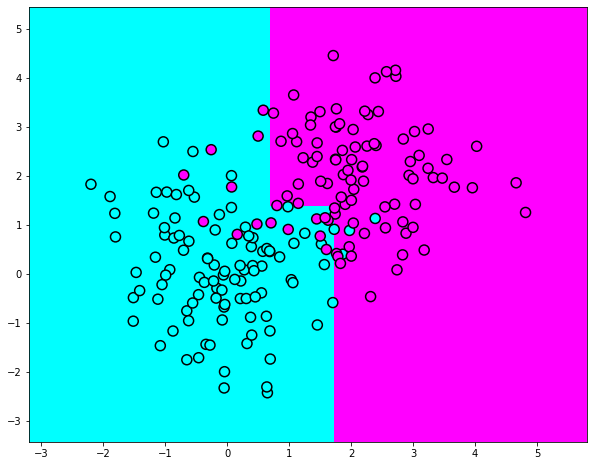

In [12]:
# отображение разделяющей поверхности
xx, yy = get_grid(train)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='cool')
plt.scatter(train[:, 0], train[:, 1], c=train_labels, s=100,
           cmap='cool', edgecolors='black', linewidth=1.5)

## Пример работы с конкретными данными
Предскажем, является ли банкнота подлинной или поддельной в зависимости от четырех различных атрибутов изображения банкноты. К атрибутам относятся вейвлет-преобразованного изображения, эксцесс изображения, энтропия и асимметрия изображения

In [18]:
dataset = pd.read_csv("banknote_authentication.csv")
dataset

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Разделим данные на атрибуты и метки

In [19]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Обучение и составление прогнозов

In [21]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

### Оценка алгоритма

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150   3]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.98      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

